<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMining2024/blob/main/20241029/%E5%8F%AF%E8%A6%96%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データマイニング第5回（20241029）

#準備
データ分析に必要なPythonライブラリー（モジュール）のインストールと読み込みを施します。


*   numpy：数値計算
*   pandas：主にデータ加工
*   matplotlib：グラフを作成
*   japanize_matplotlib：日本語を表示
*   seaborn：グラフ作成



In [ ]:
# インストール
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=cbbb28b3faab5f0155a8f8cd32267055cff78c37dda88451a94279235ce1a40b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

上のコードの最後の行、

import seaborn as sns

とすることで、sns で始める命令でグラフ等を書くことができるようになる。

# データをファイルから読み込む

前回使用したエクセルファイルを使います。

**file_path の部分を各自のディレクトリーに合わせて変更すること。
また、マウント操作も行うこと。**


In [ ]:
# 読み込むファイルを指定する
file_path = '/content/drive/MyDrive/データマイニング/customer_data.xlsx'

# 今回は、df という変数に読み込むことにする
df = pd.read_excel(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顧客ID     500 non-null    int64  
 1   性別       497 non-null    object 
 2   年齢       496 non-null    float64
 3   職業       499 non-null    object 
 4   年収       500 non-null    int64  
 5   スマホの所有   500 non-null    object 
 6   スマホ利用時間  500 non-null    float64
 7   Aの利用回数   499 non-null    float64
 8   Bの利用回数   500 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 35.3+ KB


データのクレンジングを行う。

以下のコードでは、
inplace=True を付けて drop を実行することで、dfの内容を変更している。


In [ ]:
# 欠損値のあるレコードを削除
df.dropna(inplace=True)

# 外れ値の削除
indices_to_drop = df[(df['年齢'] >= 90)].index

# 指定したインデックスのレコードを削除
df.drop(indices_to_drop, inplace=True)

df.shape

(488, 9)

欠損値を処理した結果、データ全体でレコード件数は488件、項目数は9個であることが分かる。

# レコード件数の可視化

seaborn の countplot を使うことで、カテゴリ属性の項目で分類した
レコード件数を可視化することが可能である。
分類したい**カテゴリ項目**を

x='項目名'

として指定する。

例えば、職業別のレコード数を可視化するのであれば、

In [ ]:
# 職業別にレコード件数をグラフにする
sns.countplot(x='職業', data=df)
plt.show()

`sns.countplot(data=df, x='職業')`

のように順番を変えても問題ない。

タイトルや縦軸、横軸に説明を加えることが可能。

In [ ]:
# 職業別にレコード件数をグラフにする
sns.countplot(x='職業', data=df)
plt.title('職業別の人数') # タイトル
plt.xlabel('職業')        # X軸のラベル
plt.ylabel('人数')        # Y軸のラベル
plt.show()

In [ ]:
# y='項目名'とすることで横長のグラフにもできる
sns.countplot(y='職業', data=df)
plt.title('職業別の人数')
plt.ylabel('職業')
plt.xlabel('人数')
plt.show()

### さらに分類する

hue で指定した項目でさらに分類して表示することができる。

In [ ]:
# hue で指定した項目でカテゴリ分けして表示する
# hue にはカテゴリ型の変数を指定する
sns.countplot(x='職業', hue='性別', data=df)
plt.title('職業別の人数')
plt.xlabel('職業')
plt.ylabel('人数')
plt.show()

## 色の指定

In [ ]:
# palette で色を指定できる
sns.countplot(x='職業', hue='性別', data=df, palette={'男性': 'blue', '女性': 'red'})
plt.title('職業別の人数')
plt.xlabel('職業')
plt.ylabel('人数')
plt.show()

## 代表的な色

以下の色を用いることができる。

* blue
* green
* red
* cyan
* magenta
* yellow
* black
* white

詳しくは以下を参照  
https://matplotlib.org/stable/gallery/color/named_colors.html

## 表示順序の制御

グラフの表示順序を変更することができる。

In [ ]:
# 何も指定しない場合
sns.countplot(data=df, x='性別')

order で順序を指定できる

In [ ]:
sns.countplot(data=df, x='性別', order=['女性', '男性'])

In [ ]:
# さらに、hue の表示順も変更できる
sns.countplot(data=df, x='性別', order=['女性', '男性'], hue='職業', hue_order=['学生', '会社員', '公務員', 'その他'])
plt.show()

# 棒グラフ

数値属性の項目に対して、合計や平均などの集計を行いその結果を表示するためには、

barplot

を用いる。

### 基本の使い方

In [ ]:
# 以下のコードを実行してデータフレームを作成する。
fruits = pd.DataFrame(
    data={'商品': ['リンゴ', 'みかん', 'スイカ', 'バナナ'],
          '金額': [100, 50, 700, 200]})

In [ ]:
fruits

横軸にしたい項目を x 、縦軸にしたい項目を y に指定する。
項目名はクオーテーションする必要がある。

In [ ]:
# 横軸を商品、縦軸を金額にする場合
sns.barplot(x='商品', y='金額', data = fruits)
plt.title('商品の金額')
plt.xlabel('商品')
plt.ylabel('金額（円）')
plt.show()

In [ ]:
# 縦軸と横軸を入れ替えることもできる。
sns.barplot(y='商品', x='金額', data = fruits)
plt.title('商品の金額')
plt.ylabel('商品')
plt.xlabel('金額（円）')
plt.show()

データを以下のように変更する。「バナナ」のレコードが２つある場合。

In [ ]:
fruits = pd.DataFrame(
    data={'商品': ['リンゴ', 'みかん', 'スイカ', 'バナナ', 'バナナ'],
          '金額': [100, 50, 700, 200, 250]})
fruits

barplot は自動的に集計を行う。デフォルトの集計方法は平均である。
また、95%信頼区間も表示される。

In [ ]:
# カテゴリ毎に分類され自動的に平均が計算さる
# 縦の棒は95%信頼区間
sns.barplot(x = '商品', y='金額', data = fruits)
plt.show()



---



---



以降は、customer_data.xls のデータを使うため、再度読み込みを行いクレンジングも実行する。

In [ ]:
# df という変数に読み込む。
df = pd.read_excel(file_path)

# 欠損値のあるレコードを削除
df.dropna(inplace=True)

# 外れ値の削除
indices_to_drop = df[(df['年齢'] >= 90)].index

# 指定したインデックスのレコードを削除
df.drop(indices_to_drop, inplace=True)

## barplot で可視化できること

### 例：Aの利用回数の平均は、は男女で異なるのか？

を確認するために、男性の平均と女性の平均を可視化する。
99%信頼区間も表示している。

In [ ]:
# 男女別に、Aの利用回数を平均し可視化する
# 95%信頼区間が表示される。
sns.barplot(x='性別', y='Aの利用回数', data=df, estimator=np.mean, errorbar=('ci', 99))
plt.title('男女別のAの平均利用回数')
plt.xlabel('性別')
plt.ylabel('回数')
plt.show()

estimator=np.mean
の部分を省略すると平均値を意味する。

以下の関数を指定し、平均以外も扱うことが可能。

集計関数 | 意味
-- | --
np.mean | 平均
np.median | 中央値
np.sum  | 合計


In [ ]:
# 棒グラフを描画
# estimator=np.mean の部分を省略しても自動的に平均が計算れる
sns.barplot(x='性別', y='年収', data=df)
plt.title('男女別の平均年収')
plt.xlabel('性別')
plt.ylabel('金額（万円）')
plt.show()

In [ ]:
sns.barplot(x='職業', y='Aの利用回数', data = df)

### groupby を使う方法

groupby の結果を使う際には、reset_index() を付けて
データフレーム変数に代入すると良い。

In [ ]:
grouped = df[['職業', 'Aの利用回数', 'Bの利用回数']].groupby(['職業']).mean().reset_index()
grouped

In [ ]:
# grouped = df[['職業', 'Aの利用回数', 'Bの利用回数']].groupby(['職業']).mean().reset_index()
sns.barplot(x='職業', y='Aの利用回数', order=['学生', '会社員','公務員','その他'], data = grouped)

plt.title('職業別のAの平均利用回数')
plt.xlabel('職業')
plt.ylabel('Aの利用回数')
plt.show()

#ヒストグラム

数値型の項目で、区間毎の件数を可視化したものを**ヒストグラム**と呼ぶ。

作成には、histplot を用いる。

<Axes: xlabel='年齢', ylabel='Count'>

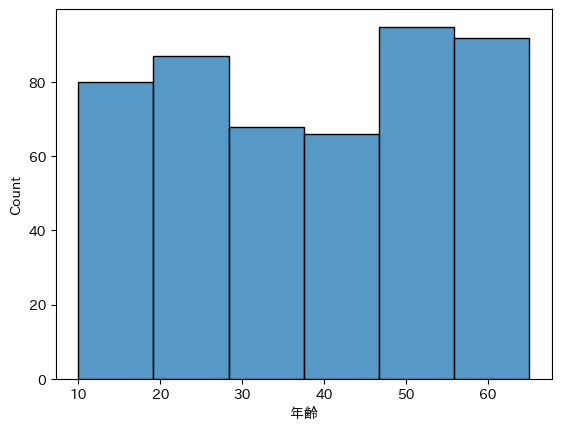

In [ ]:
sns.histplot( df['年齢'], binwidth=10)

 binwidth=10 としたことで、年齢を10歳毎に分けて（**階級**と呼ぶ）
 表示することができる。


bins=10 とすることで、年齢を10個に区分け（**階級**と呼ぶ）することを意味している。

In [ ]:
sns.histplot( df['年齢'], bins=10)

### ヒストグラムから読み取れること

データの分布の様子
（どんな範囲でレコードが多いのか（少ないのか））

In [ ]:
# 年齢のデータを取得
# ages = df['年齢']
# ヒストグラムを描画
sns.histplot( df['年齢'], bins=10, kde=True)
plt.title('年齢の分布')
plt.xlabel('年齢')
plt.ylabel('人数')
plt.show()

In [ ]:
# ヒストグラムを描画
sns.histplot( df['スマホ利用時間'])
plt.title('１日当たりのスマホ利用時間の分布')
plt.xlabel('時間/日')
plt.ylabel('人数')
plt.show()

hue を指定して分類もできる。2つのヒストグラムを重ねて表示する場合。

In [ ]:
# ヒストグラムを描画
sns.histplot( data=df, x='スマホ利用時間', hue = '性別')
plt.title('１日当たりのスマホ利用時間の分布')
plt.xlabel('時間/日')
plt.ylabel('人数')
plt.show()

hue を指定して、multiple='stack' とすると分類で積み上げることになる。

In [ ]:
# ヒストグラムを描画
sns.histplot( data=df, x='スマホ利用時間', hue = '性別', multiple="stack")
plt.title('１日当たりのスマホ利用時間の分布')
plt.xlabel('時間/日')
plt.ylabel('人数')
plt.show()

# カーネル密度プロット
分布の様子を滑らかな曲線で可視化する。

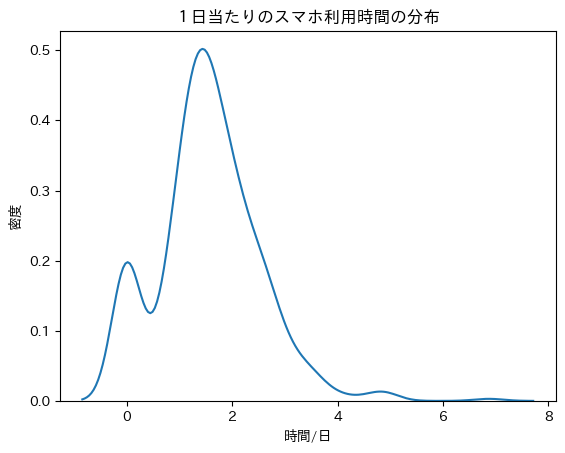

In [ ]:
# KDE Plot
sns.kdeplot(data = df, x = 'スマホ利用時間')
plt.title('１日当たりのスマホ利用時間の分布')
plt.xlabel('時間/日')
plt.ylabel('密度')
plt.show()

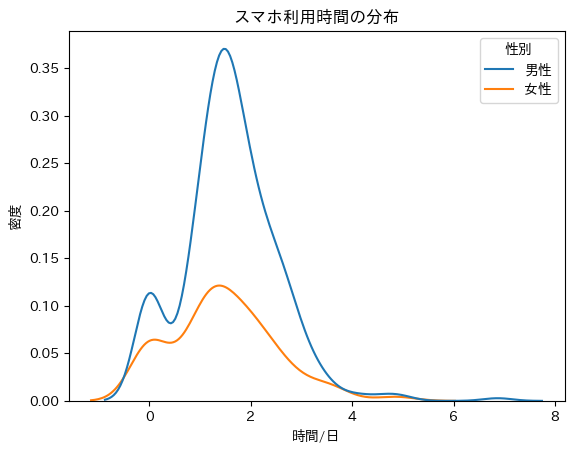

In [ ]:
sns.kdeplot(data = df, x = 'スマホ利用時間', hue = '性別')
plt.title('スマホ利用時間の分布')
plt.xlabel('時間/日')
plt.ylabel('密度')
plt.show()

# 箱ひげ図
boxplot

boxplot では、一つの図で
* 最大値
* 第三四分位
* 中央値
* 第一四分位
* 最小値

を可視化している。


In [ ]:
#sns.catplotで箱ひげ図を描く
sns.boxplot(y='年収', data=df)
plt.show()

最大と最小が棒線、第三四分位から第一四分位の間
(**四分位範囲**と呼ばれる)
で箱になっている。
また、以下の基準を超えるレコードを外れ値と判断して、黒いひし形で表示している

* 第三四分位＋「箱の長さ」×1.5 より大
* 第一四分位－「箱の長さ」×1.5 より小

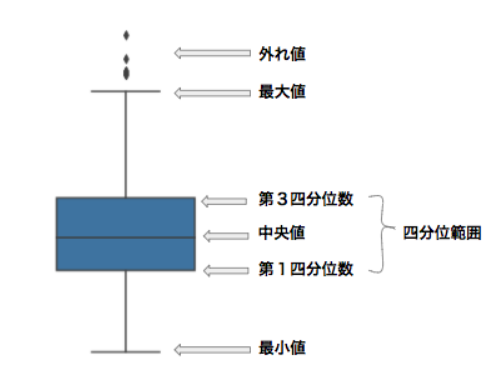

### 箱ひげ図から読み取れること

データの分布の様子
（中央値、最大最小、四分位）などを視覚的に表示

### 向きを変えることも可能

In [ ]:
#sns.catplotで箱ひげ図を描く
sns.boxplot(x='年収', data=df)
plt.show()

### カテゴリ項目で分類して表示も可能

In [ ]:
#箱ひげ図を描く
sns.boxplot(x='性別', y='年収', data=df)
plt.show()


In [ ]:
#箱ひげ図を描く
sns.boxplot(x='性別', y='スマホ利用時間', data=df)
plt.show()


#その他の可視化法

##ストリッププロット
数値の分布を確認する方法に、ストリッププロットがある。
カテゴリ項目で区別して、
分布の様子を比較する場合に良く用いる。

In [ ]:
# ストリッププロットで分布を可視化
sns.stripplot(data=df, x='性別', y='スマホ利用時間')

## スウォームプロット
ストリッププロットでは点が重なってしまう場合には、
スウォームプロットやバイオリンプロットを用いる。


In [ ]:
sns.swarmplot(data=df, x='性別', y='スマホ利用時間')

In [ ]:
sns.violinplot(data=df, x='性別', y='スマホ利用時間')

# 散布図

2つの数値型の項目をx軸とy軸に設定して、各レコードをプロットしたものを**散布図**と呼ぶ。

In [ ]:
# 年齢と収入の関係
sns.scatterplot(data=df, x='年齢', y='年収')

データにはレコードが488あるので、上の図には点が488個プロットされていることになる。（点同士が重なっている部分もある）

In [ ]:
# 性別で色分けする
sns.scatterplot(data=df, x='年齢', y='年収', hue='性別', palette={'男性': 'blue', '女性': 'red'})
plt.title('年齢と年収の関係')
plt.show()

## 相関

散布図を使うことで、2つの項目間の関係性を可視化することができる。
上の散布図からは、年齢が大きくなると年収も大きくなることが分かる。
この関係の強さを**相関**という。

特に、
一方が大きくなると他方も大きくなる場合に**正の相関**があるといい、
一方が大きくなると他方が小さくなる場合に**負の相関**があるいう。
また、相関の強さは、**相関係数** として定量化される。
相関係数は -1 から 1 の値となる量で、
正の相関がある場合は相関係数が正、負の相関の場合は負の値となる。

相関係数を求めるためには


```
corr()
```
関数を用いる。例えば、
散布図で示した「年齢」と「年収」の相関を知りたい場合は、
以下のように実行する。

In [ ]:
# 年齢と年収の相関係数
df[['年齢', '年収']].corr()

右の上のセル、あるいは左下のセルの数値が相関係数を示している。

さらに、数値型の項目全ての組み合わせで相関を計算することも可能である。

In [ ]:
df.corr(numeric_only=True)
# df.corr() はカテゴリ型の項目が含まれているため、エラーとなる。

計算の結果は、以下のような**ヒートマップ**を使って可視化することが多い。

<Axes: >

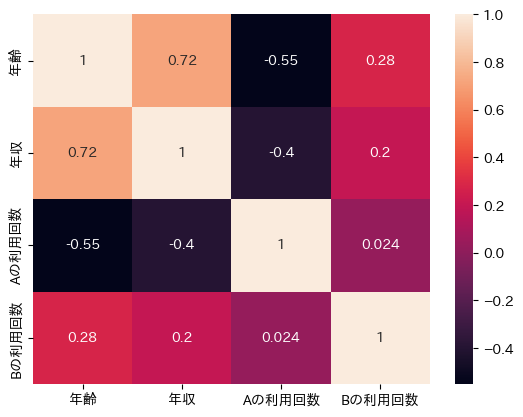

In [ ]:
#sns.heatmap(df.corr(numeric_only=True), annot=True)
sns.heatmap(df[ ['年齢', '年収', 'Aの利用回数', 'Bの利用回数'] ].corr(), annot=True)

# 同時分布図

In [ ]:
sns.jointplot(x='Aの利用回数', y='Bの利用回数', data=df)
plt.show()

In [ ]:
sns.jointplot(x='Aの利用回数', y='Bの利用回数', data=df, hue='年齢')
plt.show()

In [ ]:
sns.relplot(x='Aの利用回数', y='Bの利用回数', data=df, hue='職業', size='年収')

# 散布図行列表示

項目毎にヒストグラムと、2つの**数値型項目**の組み合わせで散布図を一度の命令で作成することが可能である。作成する図を**散布図行列**と呼び、pairplot で作成できる。

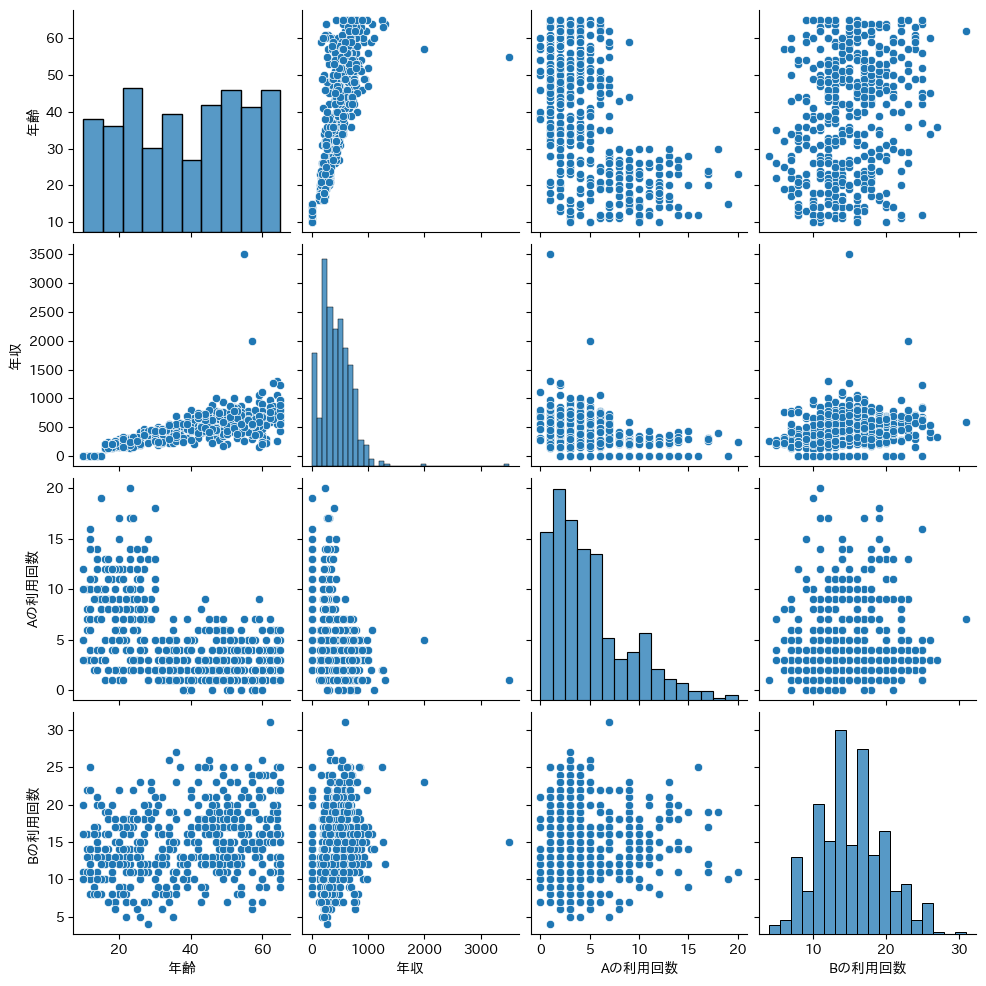

In [ ]:
sns.pairplot( data=_df )
plt.show()

hue に層別したい項目を指定できる。

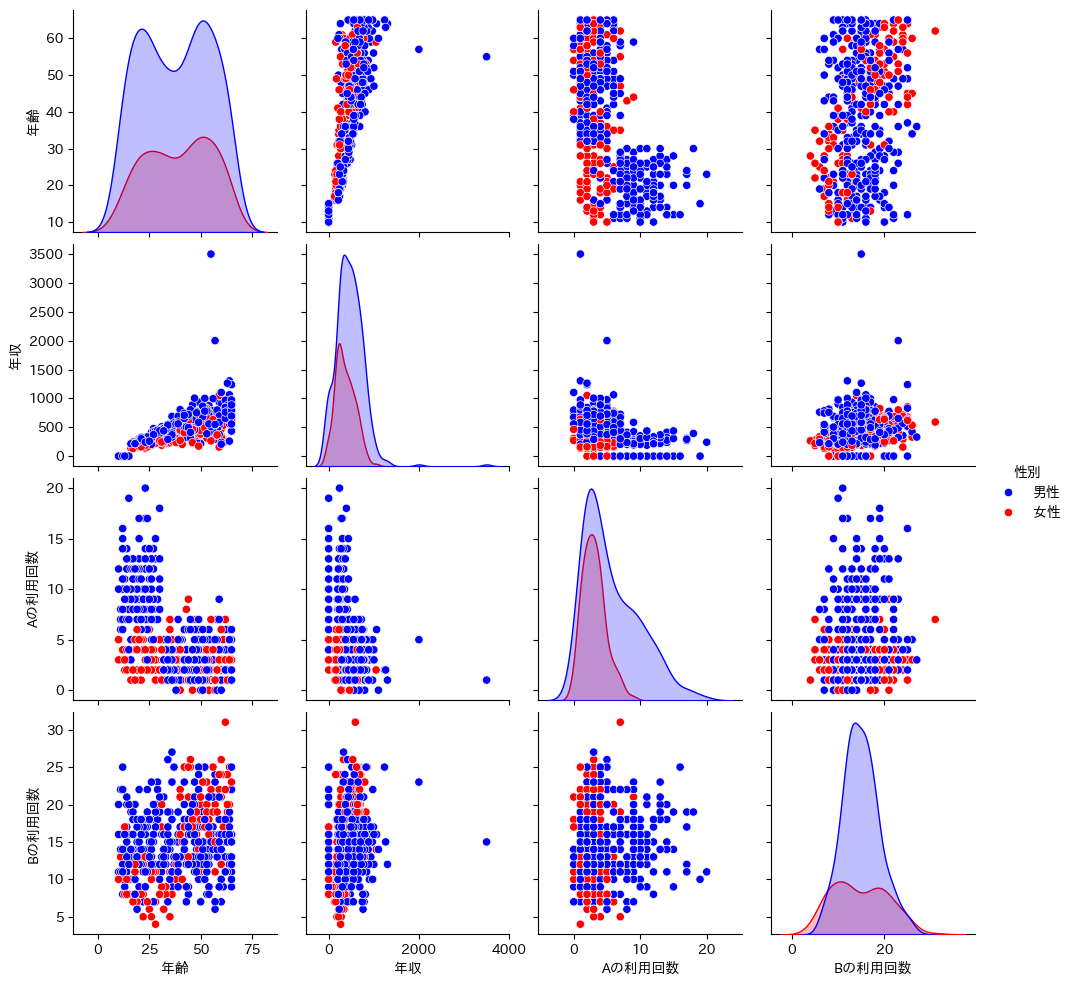

In [ ]:
_df =  df[['性別', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]
sns.pairplot( data=_df, hue='性別', palette={'男性': 'blue', '女性': 'red'})
plt.show()

---
---

#仮説検定


## データの確認

In [ ]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)
# data = data.sample(n=100, random_state=10)

#NULLを削除する
data = data.dropna()

# 年収の四分位範囲を計算
Q1 = data['年収'].quantile(0.25)
Q3 = data['年収'].quantile(0.75)
IQR = Q3 - Q1

# 異常値の範囲を定義
lower_bound = 0 # Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 異常値を除外したデータフレームを作成
data = data[(data['年収'] > lower_bound) & (data['年収'] < upper_bound)]


In [ ]:
sns.histplot(data=data, x='年収', binwidth=50.0)
plt.xlabel('年収(万円)')
plt.ylabel('頻度')
plt.title('年収のヒストグラム')
plt.show()

In [ ]:
# prompt: 年収のヒストグラムを性別で層別して作成する。
sns.histplot(data=data, x='年収', hue='性別', binwidth=50.0)
plt.xlabel('年収(万円単位)')
plt.ylabel('頻度')
plt.title('年収のヒストグラム')
plt.show()


## 平均値の差の検定（t検定）

男性と女性で平均年収に差があるのかを確認したい。

In [ ]:
pd.options.display.float_format = '{:.2f}'.format  # 小数点以下2桁で表示
#年収の平均を男女で比較する
data.groupby('性別')['年収'].mean()

In [ ]:
sns.boxplot(data=data, x='性別', y='年収')
plt.show()


In [ ]:
# prompt: 男性と女性の平均年収の差を計算する

male_mean_salary = data[data['性別'] == '男性']['年収'].mean()
female_mean_salary = data[data['性別'] == '女性']['年収'].mean()
salary_difference = male_mean_salary - female_mean_salary
print(f"男性と女性の平均年収の差: {salary_difference:.1f}")


平均年収は男性と女性で異なるが、
この差は意味のある差であるかを仮説検定を使い統計的に判断する。

仮説検定では、「仮に男女で平均年収は等しい」と仮定して、
「データから計算された差（上の例では110.4）以上のデータが得られる確率」
を計算する。
ここでの仮定を**帰無仮説**、
確率を $p$値 と呼ぶ。

$p$値が十分に小さいのであれば、
起こり得ないデータが得られたと考えられることから、
帰無仮説が間違っていた
（帰無仮説を**棄却する**という）、
すなわち
男女で平均年収は等しくないと結論付ける。
**統計的に優位な差がある**という。

通常は$p$値が 0.05 以下になれば、十分小さいとする。
0.05 という基準を
**有意水準** と呼び、$α$ という記号を用いる。

確率を計算するために scipy パッケージが便利である。


パッケージをインポートするためには、以下のようにする。
```
# from scipy import stats
```

検定を行うためには、検定したい2つのデータが
それぞれ変数A,Bに格納されているとして
```
t_stat, p_value = stats.ttest_ind(A, B)
```
と実行する。$p$値は変数 p_value に格納される。

具体的には、以下のように実行する。



In [ ]:
# パッケージのインポート
from scipy import stats

# 男女間の年収の平均を比較
data_male = data[data['性別'] == '男性']['年収']
data_female = data[data['性別'] == '女性']['年収']

# t検定を実行
t_stat, p_value = stats.ttest_ind(data_male, data_female)

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.5f}")


上の例では、
$p$値が小さく
確率の非常に小さなデータが得られていることになる。
すなわち、帰無仮説は棄却され、
**有意水準 $\alpha=0.05$ で男女間で年収は統計的に優位な差がある**
と結論付けされる。

一方で、もし$p$値が優位水準より大きな場合、
統計的には帰無仮説を否定するだけのデータが得られていないことになる。
**帰無仮説が正しいと主張することもできない点に注意する。**

## 等分散性の確認
t検定は、
2つのグループ（上の例では男性と女性の年収）の
分散が等しい場合に用いる方法である。

そこで、分散が等しいことを確認する必要がある。
これには、ルビーン検定が用いられる。

ここでの帰無仮説は
**男性と女性で収入の分布の分散が等しい**
である。

In [ ]:
data_male.var()

In [ ]:
data_female.var()

In [ ]:
# prompt: 男性と女性で年収の分布の分散が等しいか検定する

# 等分散性の検定
levene_stat, levene_p_value = stats.levene(data_male, data_female)
print(f"Levene's test statistic: {levene_stat:.2f}")
print(f"p-value: {levene_p_value:.5f}")

この結果より、
$p$ 値が大きく
帰無仮説を積極的に否定するデータが得られていない、
と結論することになる。


### 余談
帰無仮説として設定できない仮定もある。例えば、
「男性と女性で年収の分布の分散が異なる」
という仮定は帰無仮説として用いることはできない。
「異なる」といったように無数に可能性が考えられるような仮説は
帰無仮説として用いることはできない。
帰無仮説となるものは、「等しい」など一点となるような仮説である。

### ウェルチのt検定

2つの群のデータの分散が異なる
（等分散という帰無仮説が棄却された場合）
と判断される場合には
ウェルチのt検定を用いる。この場合は、
「equal_var=False」を追加して、以下のようにすればよい。

```
ttest_ind(data_male, data_female, equal_var=False)
```


In [ ]:
# パッケージのインポート
from scipy import stats

# 男女間の年収の平均を比較
data_male = data[data['性別'] == '男性']['年収']
data_female = data[data['性別'] == '女性']['年収']

# t検定を実行
t_stat, p_value = stats.ttest_ind(data_male, data_female, equal_var=False)

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.5f}")


## 会社員と公務員で年収の平均の差を検定する

In [ ]:
# 職業が会社員と公務員のデータフレームを作成する。
data_sub = data[( data['職業'] == '会社員') | ( data['職業'] == '公務員')]


Boxプロットで分布の様子を確認する。

In [ ]:
sns.boxplot(data=data_sub, x='職業', y='年収')
plt.show()

---
---
---


# 基礎集計と可視化のまとめ

基礎集計と可視化を使ってデータを理解する際のポイントをまとめる。
ここで、データはPandasのデータフレームに格納されており、
変数名を df とする。

## データ理解

### 各列が、数値型とカテゴリ型のどちらかを把握する

```
df.info()
```

### 欠損値の有無を確認する
```
df.isnull().sum()
```

### 欠損値の処理

* 数値型の場合

欠損値を平均や中央値などの適切な数値で埋める
```
fillna( 適切な数値 )
```

* カテゴリ型の場合

カテゴリ毎のレコード数を確認し、
モードなどの適切なカテゴリを判断する。
```
value_count()
```

### 統計量の確認

数値型の列に対しては記述統計量の確認を行い、
値の妥当性や外れ値の有無を確認する。

```
df.describe()
```

### 項目単体での分析

* カテゴリ型の場合

カテゴリ毎の件数を可視化
```
sns.countplot()
```

カテゴリ毎の件数の確認
```
value_counts()
```

* 数値型の場合

分布の確認
```
sns.boxplot()
```

## 複数項目での分析

### カテゴリ項目の場合

項目1のカテゴリ毎の件数を項目2で層別して可視化する。

```
sns.countplot(x='項目1', hue='項目2', data=df)
```

### 数値項目の場合

数値型の項目1の分布を、カテゴリ型の項目2で層別して可視化する。

```
sns.boxplot(x='項目1', y='項目2', data=df)
```

全ての数値型の項目で、散布図を描く

```
sns.pairplot()
```

相関行列をヒートマップで可視化する。
```
sns.heatmap(df.corr(numeric_only=True), annot=True)
```

## 外れ値（異常値）の処理

### 数値型の列の場合

異常値の考え方の主なものは以下の2つである。

* 平均から標準偏差の3倍以上離れたもの
* 四分位範囲（第三四分位と第一四分位の差）を用いたもの
  * 第三四分位＋「四分位範囲」×1.5 より大
  * 第一四分位－「四分位範囲」×1.5 より小

### カテゴリ型の場合

レコード数が極端に少ないカテゴリを 異常値と考え、
「その他」として集約することが行われる場合がある。

---
---

#参考

##正規性の確認

シャピロ・ウィルク検定

In [ ]:
# prompt: 年収が正分布が検定して確認する。可視化にはseaborn を使う

import matplotlib.pyplot as plt
# Shapiro-Wilk 検定で正規性を検定
stat, p_value = stats.shapiro(data['年収'])
print(f"Shapiro-Wilk 検定の統計量: {stat:.2f}")
print(f"p値: {p_value:.5f}")

# ヒストグラムと正規分布曲線を重ねて可視化
sns.histplot(data=data, x='年収', kde=True)
plt.show()

# Q-Q プロットで正規性を可視化
stats.probplot(data['年収'], dist="norm", plot=plt)
plt.show()




---

---



---





## スタイルの設定

set_style を使って、表示のスタイルを変更できる。以下のスタイルが設定可能である。

スタイル | 説明
--       | --
darkgrid | 背景暗、グリッドあり
dark | 背景暗、グリッドなし
whitegrid | 背景白、グリッドあり
white | 背景白、グリッドなし
ticks | 背景白、軸にのみグリッドあり

In [ ]:
# グリッド線を表示する場合は以下を行う
sns.set_style('whitegrid')

# 性別で色分けする
sns.scatterplot(data=df, x='年齢', y='年収', hue='性別', palette={'男性': 'blue', '女性': 'red'})
plt.title('年齢と年収の関係')
plt.show()